# Comparison of the Twitter Metrics of the 44th and 45th President of the United States (or...The Obama Report)
## Author: Siddharth Nanda

In [1]:
# Package imports
import pandas as pd
import twitter
import nltk
from nltk.corpus import stopwords
from afinn import Afinn
import re
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [2]:
# Twitter handles for each President
trump = 'realDonaldTrump'
obama = 'POTUS44'
obama2 = 'BarackObama'

In [3]:
# Dataframes for favorites/retweets/tweets for each President
trump_data = twitter.tweets_favorites_retweets(trump)
obama_data = twitter.tweets_favorites_retweets(obama)
obama_after_prez = twitter.tweets_favorites_retweets(obama2)

In [4]:
# Throws out all tweets during the Presidency for Obama's Personal Twitter Account
obama_after_prez = obama_after_prez.truncate(after=64)

In [5]:
# Reindexes the data frames so they go from oldest to newest rather than newest to oldest
trump_data = trump_data.reindex(index=trump_data.index[::-1])
obama_data = obama_data.reindex(index=obama_data.index[::-1])
obama_after_prez = obama_after_prez.reindex(index=obama_after_prez.index[::-1])

/Users/siddharthnanda/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
/Users/siddharthnanda/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
/Users/siddharthnanda/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


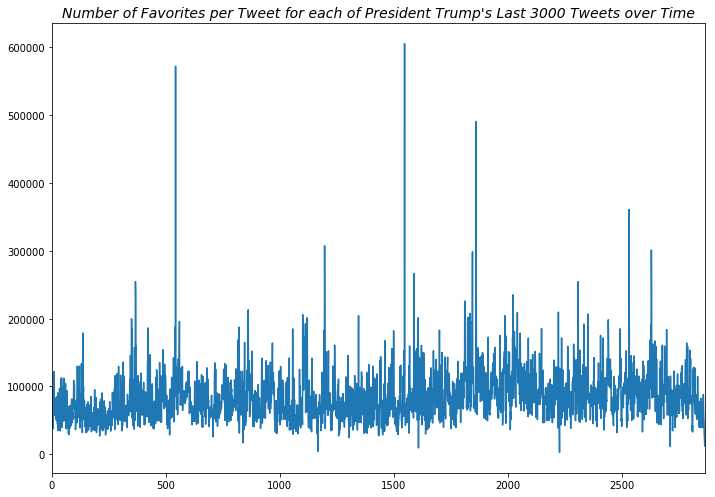

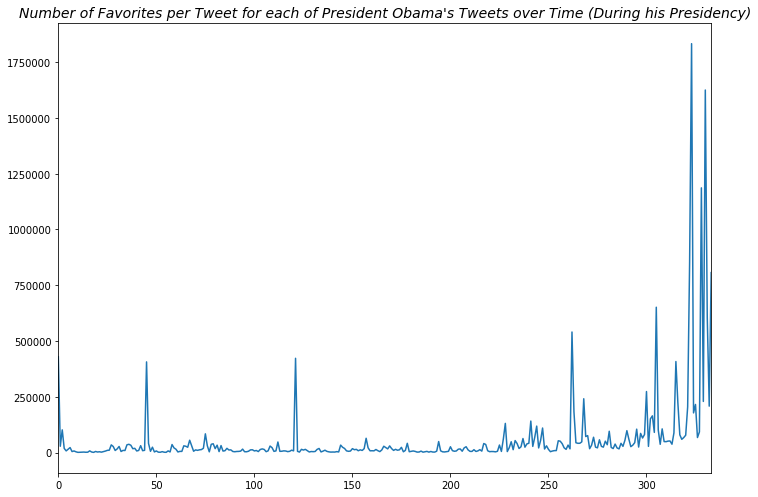

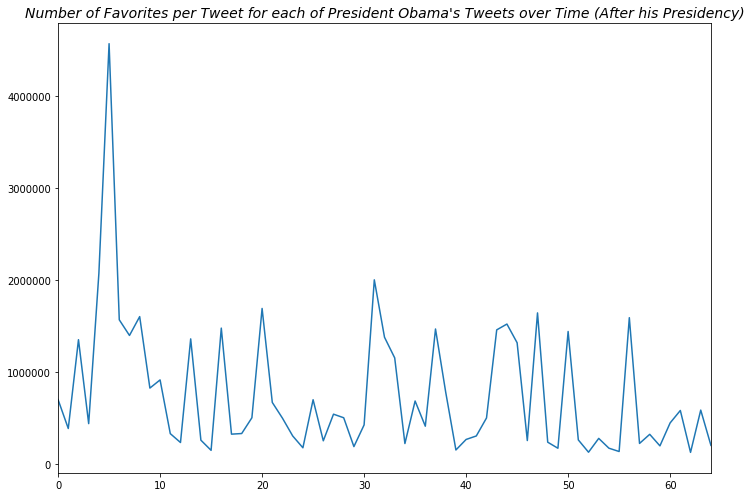

In [6]:
# Creates Timeseries for Favorites 
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.title("Number of Favorites per Tweet for each of President Trump's Last 3000 Tweets over Time",
          fontstyle='italic', fontsize=14)
sns.tsplot(trump_data['favorites'])

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.title("Number of Favorites per Tweet for each of President Obama's Tweets over Time (During his Presidency)",
          fontstyle='italic', fontsize=14)
sns.tsplot(obama_data['favorites'])

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.title("Number of Favorites per Tweet for each of President Obama's Tweets over Time (After his Presidency)",
          fontstyle='italic', fontsize=14)
sns.tsplot(obama_after_prez['favorites'])

/Users/siddharthnanda/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
/Users/siddharthnanda/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
/Users/siddharthnanda/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


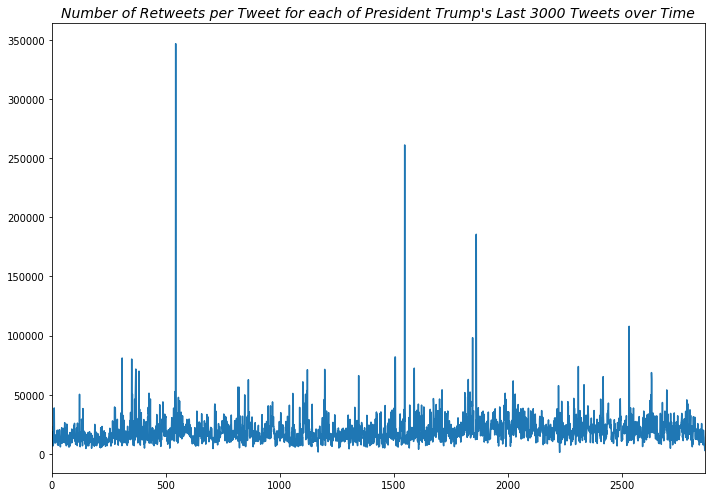

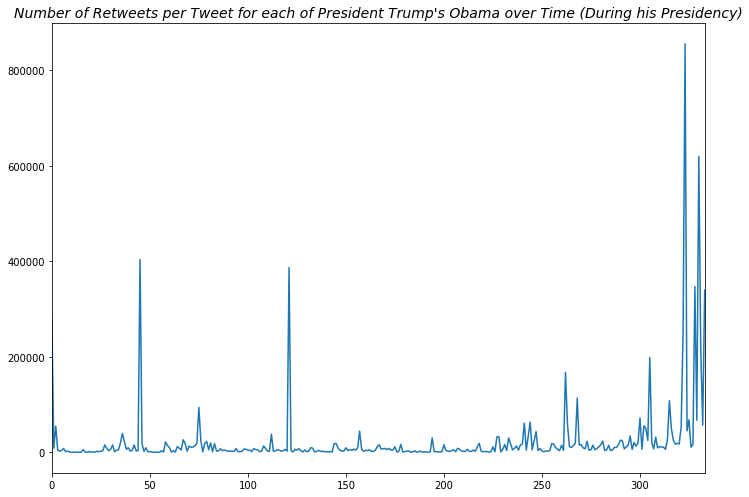

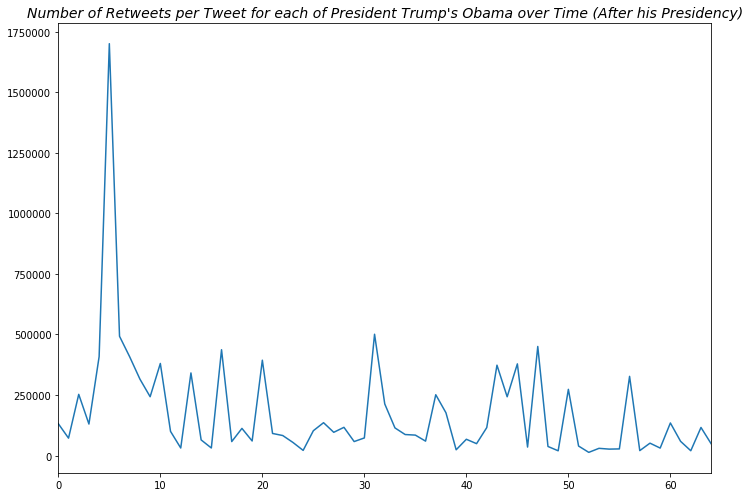

In [7]:
# Creates Timeseries for Retweets 
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.title("Number of Retweets per Tweet for each of President Trump's Last 3000 Tweets over Time",
          fontstyle='italic', fontsize=14)
sns.tsplot(trump_data['retweets'])

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.title("Number of Retweets per Tweet for each of President Trump's Obama over Time (During his Presidency)",
          fontstyle='italic', fontsize=14)
sns.tsplot(obama_data['retweets'])

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.title("Number of Retweets per Tweet for each of President Trump's Obama over Time (After his Presidency)",
          fontstyle='italic', fontsize=14)
sns.tsplot(obama_after_prez['retweets'])

Examination of the timeseries for favorites and retweets for the two Presidents the same trend for both variables. President Trump exhibits high activity (with a high average of favorites and likes for verified accounts) on Twitter and shows spikes near especially popular tweets. While, President Obama's activity is much more reserved, his favorites/retweet average during his Presidency is more similar to President Trump's activity, while his post-presidential activity is extremely infrequent but extremely popular.

In [8]:
# Creates various series that contain labels/data and combines them into a dataframe that seaborn can use
presidents = pd.Series(['President Donald J. Trump', 'President Donald J. Trump', 
                        'President Barack Obama (During Presidency)', 'President Barack Obama (During Presidency)', 
                        'President Barack Obama (After Presidency)', 'President Barack Obama (After Presidency)'])
nums = pd.Series([trump_data['favorites'].sum(), trump_data['retweets'].sum(),
                  obama_data['favorites'].sum(), obama_data['retweets'].sum(), 
                  obama_after_prez['favorites'].sum(), obama_after_prez['retweets'].sum()])
variables = pd.Series(['Favorited', 'Retweeted', 'Favorited', 'Retweeted', 'Favorited', 'Retweeted'])

president_data = pd.DataFrame({'President': presidents, 'Action on Tweet': variables, 'Average Number of People': nums})

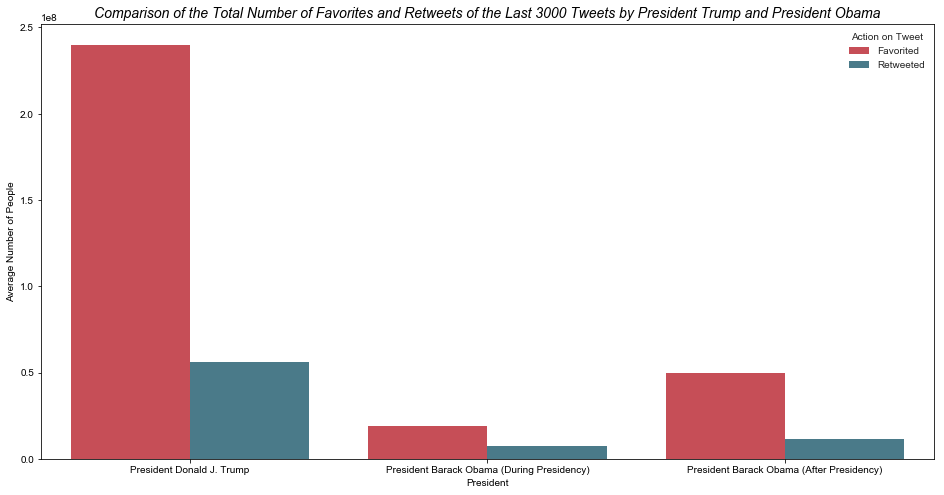

In [9]:
# Creates figure comparing the 44th and 45th Presidents Twitter Popularity through Totals
f, (prez) = plt.subplots(figsize=(16, 8))
sns.set_style("whitegrid")
rb = sns.diverging_palette(10, 220, sep=80, n=2)
prez.set_title("Comparison of the Total Number of Favorites and Retweets of the Last 3000 Tweets by President Trump and President Obama",
                     fontstyle='italic', fontsize=14)

prez = sns.barplot(x="President", y ='Average Number of People', hue='Action on Tweet',
                         palette=rb, data=president_data)

In [10]:
# Creates various series that contain labels/data and combines them into a dataframe that seaborn can use
presidents = pd.Series(['President Donald J. Trump', 'President Donald J. Trump', 
                        'President Barack Obama (During Presidency)', 'President Barack Obama (During Presidency)', 
                        'President Barack Obama (After Presidency)', 'President Barack Obama (After Presidency)'])
nums = pd.Series([trump_data['favorites'].mean(), trump_data['retweets'].mean(),
                  obama_data['favorites'].mean(), obama_data['retweets'].mean(), 
                  obama_after_prez['favorites'].mean(), obama_after_prez['retweets'].mean()])
variables = pd.Series(['Favorited', 'Retweeted', 'Favorited', 'Retweeted', 'Favorited', 'Retweeted'])

president_data = pd.DataFrame({'President': presidents, 'Action on Tweet': variables, 'Average Number of People': nums})

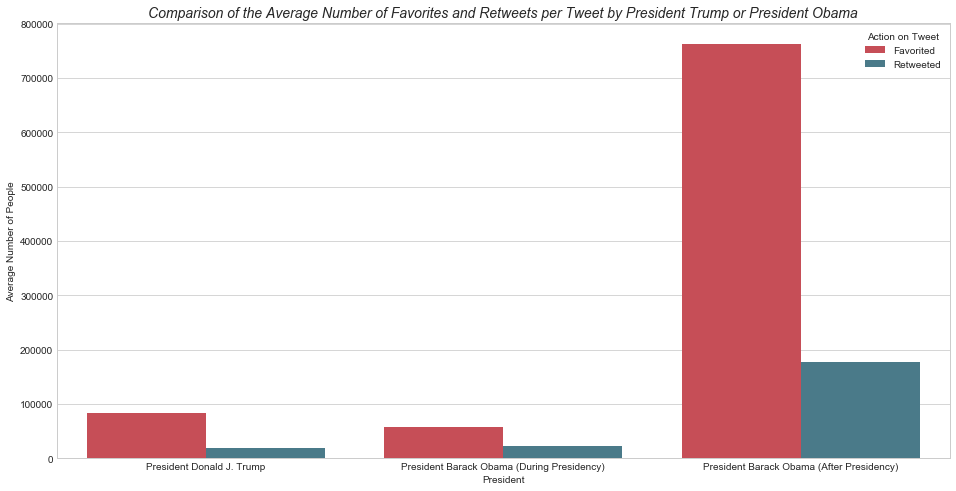

In [11]:
# Creates figure comparing the 44th and 45th Presidents Twitter Popularity through Averages 
f, (prez) = plt.subplots(figsize=(16, 8))
sns.set_style("whitegrid")
rb = sns.diverging_palette(10, 220, sep=80, n=2)
prez.set_title('Comparison of the Average Number of Favorites and Retweets per Tweet by President Trump or President Obama',
                     fontstyle='italic', fontsize=14)

prez = sns.barplot(x="President", y ='Average Number of People', hue='Action on Tweet',
                         palette=rb, data=president_data)

The two barcharts expose the data from the two timeseries graphs more clearly: with President Trump dominating the totals due to his high activity level on the platform while President Obama's post-presidency average shows that his account has become one of the most closely watched (and presumably approved of) on Twitter since Trump's inaugaration.

In [12]:
# Text files with the contents of each President's tweets
trump_data['tweets'].to_csv(r'trump.txt', header=None, index=None, sep=' ', mode='a')
obama_data['tweets'].to_csv(r'obama.txt', header=None, index=None, sep=' ', mode='a')
obama_after_prez['tweets'].to_csv(r'obama_post.txt', header=None, index=None, sep=' ', mode='a')

In [13]:
# Loads contents of all tweets into variables
trump_content = open('trump.txt').read()
obama_content = open('obama.txt').read()
obama_post_content = open('obama_post.txt').read()

In [14]:
# Sets containing words to be removed
stop_words = set(stopwords.words('english'))
manual_removal = set(['http', 'https', 'amp', 'a', 'and', 'but', 'because', 'it', "n't", 'or', 'so', 'rt', 'the'])

In [15]:
'''Two functions: one to get the 25 most common words used by each politician in their tweets
and another to add those words and the frequency of their use to a DataFrame'''
def cleanAndFindMostCommon(text):
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if not word in stop_words]
    final_words = []
    for word in filtered_words:
        if re.match('[a-zA-Z]+', word) and word.lower() not in manual_removal:
            final_words.append(word.lower())
    word_frequencies = nltk.FreqDist(final_words)
    return word_frequencies.most_common(25)

def addToFrame(words):
    pwords = []
    pfreqs = []
    for x, y in words:
        pwords.append(x)
        pfreqs.append(y)
    return pd.DataFrame({'Word': pwords, 'Frequency': pfreqs})

In [16]:
# Tokenizes words for all tweets for each President
trump_words = cleanAndFindMostCommon(trump_content)
obama_words = cleanAndFindMostCommon(obama_content)
obama_post_words = cleanAndFindMostCommon(obama_post_content)

In [17]:
# Creates dataframes for use in graphing
trump_dist = addToFrame(trump_words)
obama_dist = addToFrame(obama_words)
obama_post_dist = addToFrame(obama_post_words)

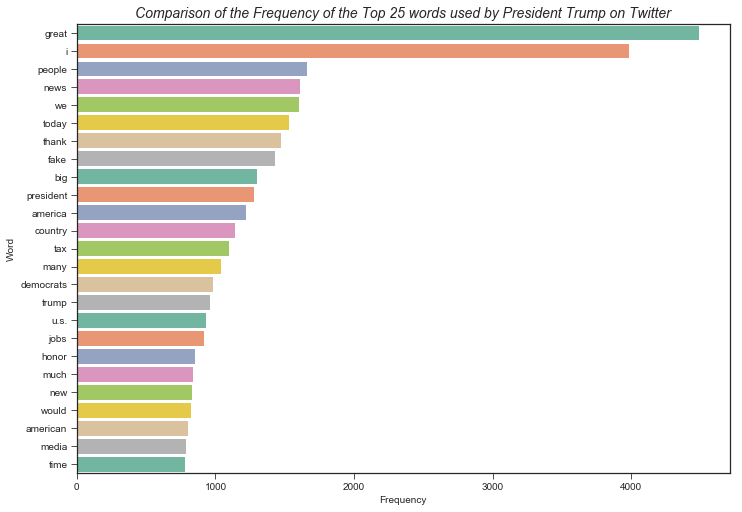

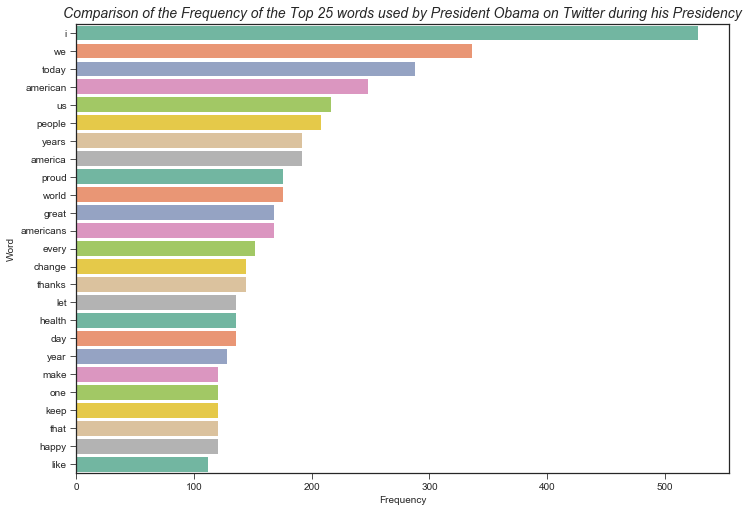

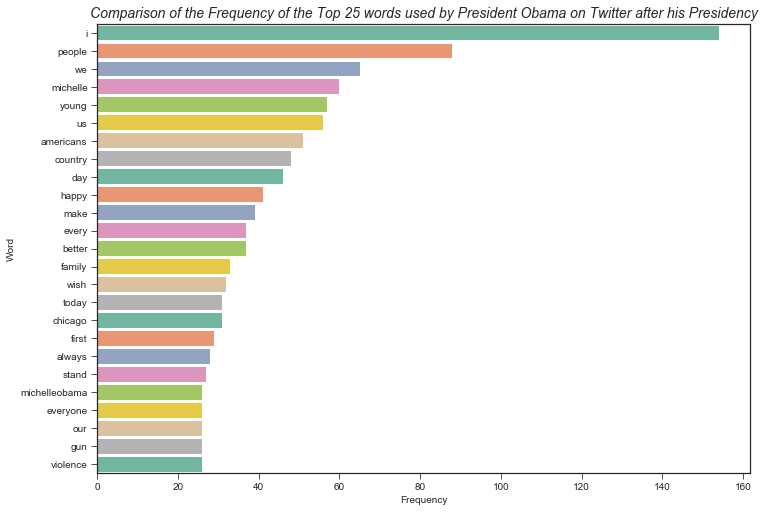

In [18]:
# Creates figures comparing the top 25 words used by the two Presidents on Twitter
sns.set_style('ticks')
pal = sns.color_palette("Set2", 25)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.title('Comparison of the Frequency of the Top 25 words used by President Trump on Twitter',
          fontstyle='italic', fontsize=14)
sns.barplot(x="Frequency", y ='Word', palette=pal, data=trump_dist)

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.title('Comparison of the Frequency of the Top 25 words used by President Obama on Twitter during his Presidency',
          fontstyle='italic', fontsize=14)
sns.barplot(x="Frequency", y ='Word', palette=pal, data=obama_dist)

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.title('Comparison of the Frequency of the Top 25 words used by President Obama on Twitter after his Presidency',
          fontstyle='italic', fontsize=14)
sns.barplot(x="Frequency", y ='Word', palette=pal, data=obama_post_dist)

Each president's lexicon illustrates their legislative priorties and unique style in interacting with the American people. Note (06/06/18) : A LDA based topic analysis will be coming soon to follow up on this section of the report.

In [19]:
# Creates lists containing each President's tweets
trump_tweets_in_list = list(trump_data['tweets'])
obama_tweets_in_list = list(obama_data['tweets'])
barack_tweets_in_list = list(obama_after_prez['tweets'])

In [20]:
# Small function that returns the average Afinn sentiment score for the President's tweets
def avgScore(tweets):
    afinn = Afinn()
    score = 0
    counter = 0
    for tweet in tweets:
        score += afinn.score(tweet)
        counter += 1
    return score/counter

In [21]:
# Sentiment data for each President
trump_sentiment = avgScore(trump_tweets_in_list)
obama_sentiment = avgScore(obama_tweets_in_list)
obama_post_sentiment = avgScore(barack_tweets_in_list)

In [22]:
# Creates various series that contain labels/data and combines them into a dataframe that seaborn can use
presidents = pd.Series(['President Donald J. Trump', 'President Barack Obama (During Presidency)'
                        ,'President Barack Obama (After Presidency)'])
sentiments = pd.Series([trump_sentiment, obama_sentiment, obama_post_sentiment])

president_data = pd.DataFrame({'President': presidents, 'Sentiment': sentiments})

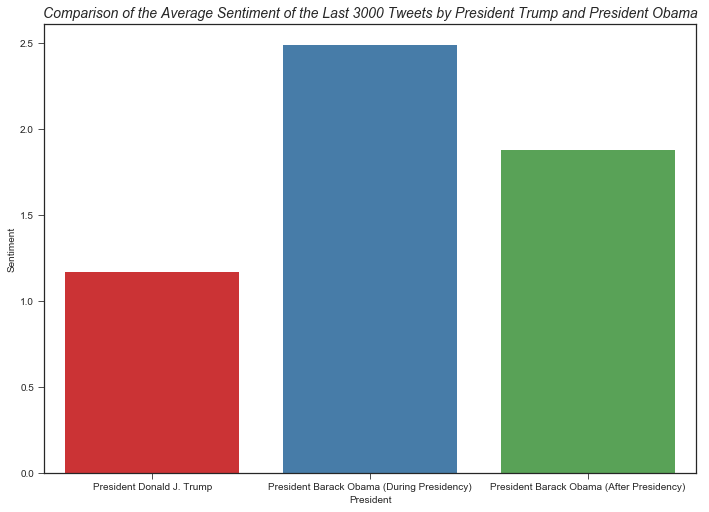

In [23]:
# Creates figure comparing the Average Sentiment of Tweets by the 44th and 45th Presidents
sns.set_style('ticks')
pal = sns.color_palette("Set1", 25)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.title("Comparison of the Average Sentiment of the Last 3000 Tweets by President Trump and President Obama",
          fontstyle='italic', fontsize=14)
sns.barplot(x="President", y ='Sentiment', palette=pal, data=president_data)

Perhaps unsurprisingly, President Obama's tweets strike a more positive tone than President Trumps (by a significant amount: President Obama's average sentiment score is almost twice President Trump's during his presidency), and dropoff after his exit from the White House.